<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

#### Analysis

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import pandas as pd
import data_cleaning as dc
import matplotlib.pyplot as plt
dirty_data = pd.read_csv('./data/dirtydata.csv')
clean = dc.full_clean(dirty_data)

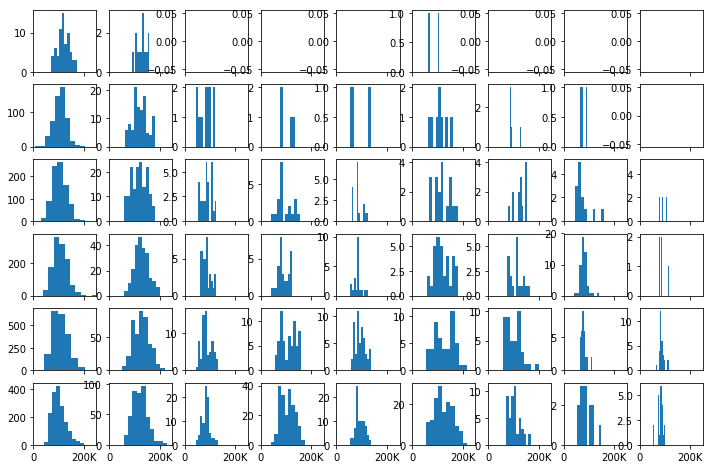

In [88]:
# Visual Checks on Normality of Dependent Variable (Salary) among Groups

# Year/Role
nrows = len(clean['Year'].unique())
ncols = len(clean['Role'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharex='all')
for nr, year in enumerate(clean['Year'].unique()):
    for nc, role in enumerate(clean['Role'].unique()):
        axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Role']==role)].Salary)
        axes[nr][nc].set_xlim([0, 250000])
        axes[nr][nc].set_xticklabels(['0', '200K'])
plt.show()

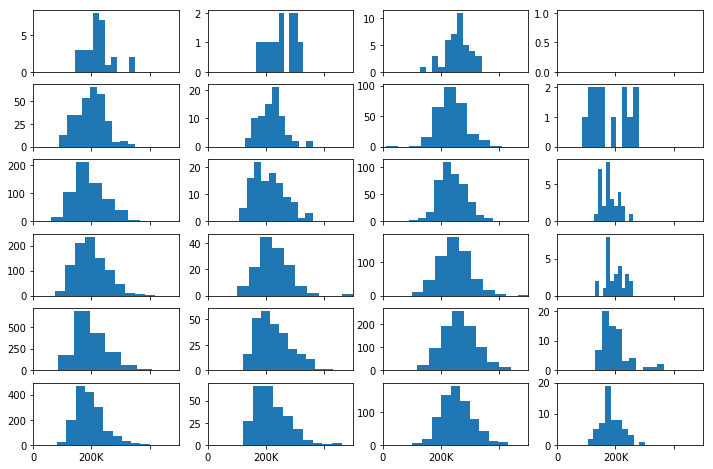

In [89]:
# Year/Region

nrows = len(clean['Year'].unique())
ncols = len(clean['Region'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharex='all')
for nr, year in enumerate(clean['Year'].unique()):
    for nc, reg in enumerate(clean['Region'].unique()):
        axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Region']==reg)].Salary)
        axes[nr][nc].set_xlim([0, 250000])
        axes[nr][nc].set_xticklabels(['0', '200K'])
plt.show()

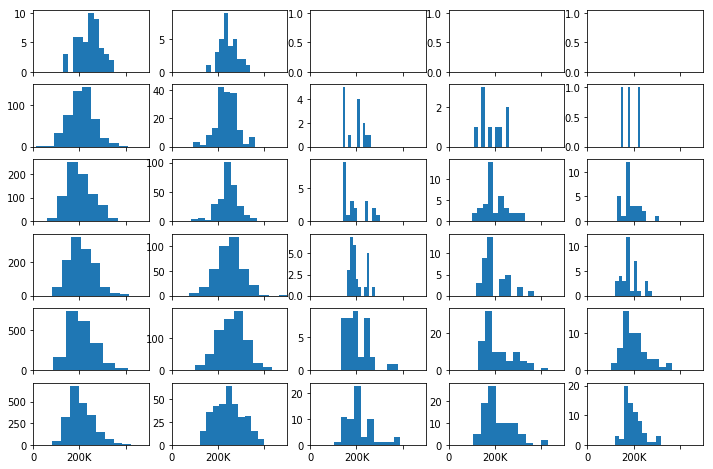

In [90]:
# Year/Industry

nrows = len(clean['Year'].unique())
ncols = len(clean['Industry'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharex='all')
for nr, year in enumerate(clean['Year'].unique()):
    for nc, industry in enumerate(clean['Industry'].unique()):
        axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Industry']==industry)].Salary)
        axes[nr][nc].set_xlim([0, 250000])
        axes[nr][nc].set_xticklabels(['0', '200K'])
plt.show()

#### Findings & Application

#### Limitations

#### Next Steps